# Практическая работа №1: Краевая задача для уравнения II-го порядка

Выполнил студент гр. 9382 Павлов Роман, вариант 10.

## Цель работы

Научиться применять дифференциальные уравнения в различных областях, решать краевую задачу для уравнения II-го порядка путём многократного решения задачи Коши.

## Основные теоретические положения

### Метод половинного деления

Если функция $f(x)$ непрерывна на отрезке $[x_a, x_b]$ и имеет разные знаки на концах этого отрезка, то она имеет как минимум один корень на этом отрезке.

Пусть $x_m$ - середина отрезка $[x_a, x_b]$.

Тогда если $sign(x_a) = sign(x_m)$, то левый конец отрезка сдвигается вправо и становится равным x_m.

Если $sign(x_b) = sign(x_m)$, то уже правый конец отрезка сдвигается влево и становится равным x_m.

Если $sign(x_m) = 0$, то корень функции - $x_m$.

Применяя половинное деление к отрезку раз за разом, можно добиться того, что отрезок получится достаточно коротким и его длина будет меньше заданного $\varepsilon > 0$ - допустимого для искомого корня отклонения. Также можно потребовать, чтобы значения функции на концах полученного таким образом отрезка отличались от нуля меньше, чем на $\delta > 0$. Для данной работы выбран второй способ.

### Задача Коши

Задача Коши в общем виде выглядит следующим образом:

$\begin{cases}
    f(x, y, y, y'', ..., y^{(n)}) = 0,\\
    y(x_0) = y_0,\\
    y'(x_0) = y_1,\\
    y''(x_0) = y_2,\\
    ...\\
    y^{(n-1)}(x_0) = y_{n-1}
 \end{cases}$
 
 Задача подразумевает нахождение частных решений дифференциального уравнения, основываясь на условиях вида $y^{(i)}(x_0) = y_i$. При подстановке значений $y_i$ в общее решение находятся неизвестные константы, которые удовлетворяют условиям.
 
 ### Краевая задача
 
Дано: уравнение $y'' = f(x, y, y'), a \le x \le b$ (1)\
и два числа $(y_a, y_b)$.

Требуется: найти решение уравнения (1), удовлетворяющее условиям\
$\begin{cases}
    y(a) = y_a\\
    y(b) = y_b
 \end{cases}$
(2)

Такая задача называется краевой, а условия (2) – краевыми или граничными.
По сравнению с задачей Коши, краевая задача более сложна и с теоретической и с
практической точек зрения. Она не всегда имеет решение, а когда решение существует,
оно не всегда единственно.

## Постановка задачи

Дано дифференциальное уравнение:
<center>$y'' = f(x, y), a \le x \le b$ (1)</center>

и граничные условия
<center>$y(a) = y_a, y(b) = y_b$. (2)</center>

Требуется найти решение задачи (1)-(2) и построить его график.

Рассмотрим задачу Коши для уравнения (1) с начальными условиями
<center>$y(a) = y_a, y'(a) = h$ (3)</center>

План решения основан на многократном решении задачи Коши (1), (3). Значение решения задачи Коши при $x = b$ является функцией от $h$.\
Задача сводится к отысканию такого значения переменной $h$, при котором выполнено условие на правом конце отрезка, т.е. должно выполняться
<center>$y(b, h) = y_b$. (4)</center>

Это уравнение с одним неизвестным $h$. Для его решения можно применить стандартный метод половинного
деления.

## Выполнение работы

### Вариант №28
$y'' = 2^{-x}(x - y)\\
a = 0, b = 2\\
y_a = 4, y_b = 1$

In [1]:
import numpy as np
import matplotlib.pyplot as pt
from scipy.integrate import odeint
from math import sqrt

m, M = (0, 100); precision = 0.001

a, b = (0, 2)
dx = np.linspace(a, b, 100, True)
y_a, y_b = (4, 1)

h = 0

def f_xy(y, x):
    return [y[1], (2**(-x))*(x - y[0])]

Выбрано начальное значение $h = 0$.

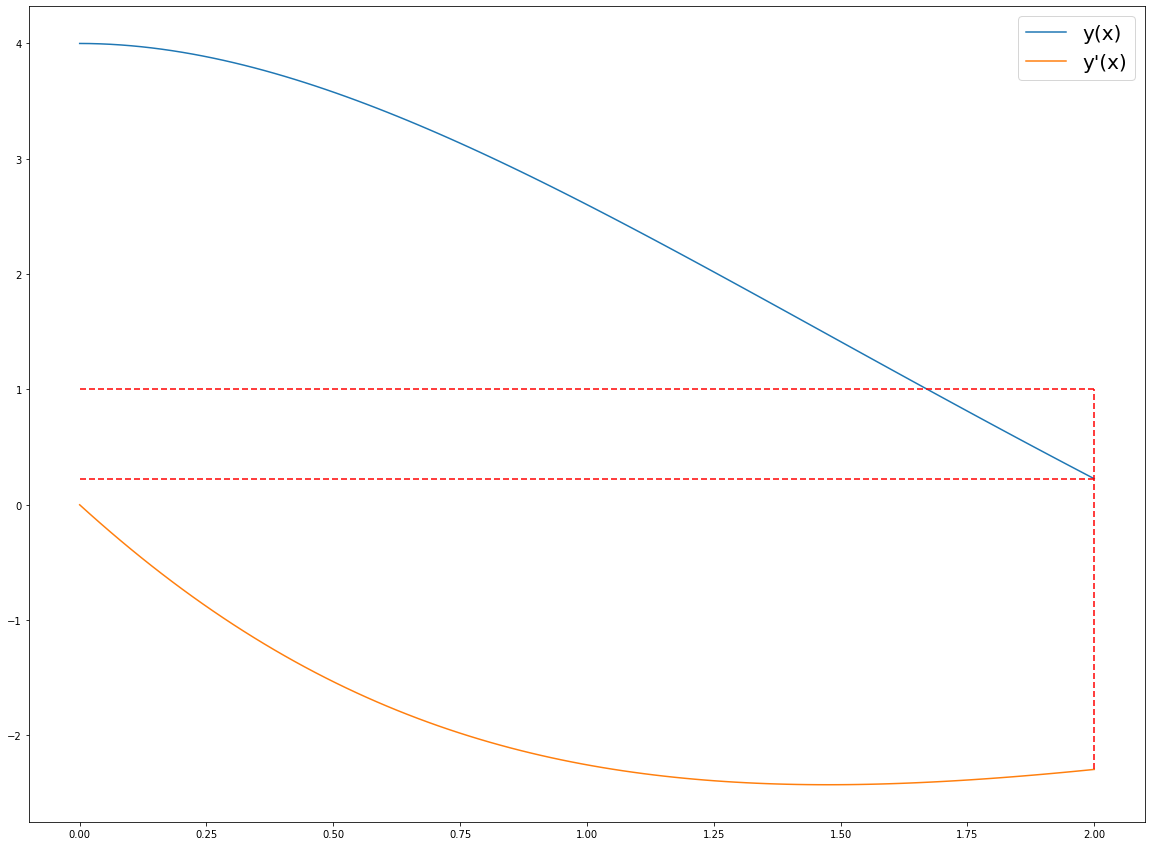

y(b, h): 0.22609195077482086


In [2]:
solution = odeint(f_xy, [y_a, h], dx)
y_bh = solution[-1][0]

pt.figure(figsize=(20, 15))
pt.plot(dx, solution, label = ("y(x)", "y'(x)"))
pt.plot(dx, [y_bh]*100, dashes = (4, 2), color="red")
pt.plot(dx, [y_b]*100, dashes = (4, 2), color="red")
pt.plot([2]*100, np.linspace(solution[-1][1], y_b, 100, True), dashes = (4, 2), color="red")
pt.legend(prop = {"size": 20})
pt.show()
print("y(b, h):", y_bh)

После интегрирования системы уравнений первого порядка получены кривые, изображённые выше. Видно, что начальное приближение h не является решением краевой задачи, так как $|y(b, h) - 1| \ge 0.001$.

Реализован алгоритм поиска $h$ путём многократного решения задачи Коши. Начальный шаг равен 1 - интуитивно понятно, что нужно замедлить убывание функции.

Сначала проверяется, правильно ли выбрано направление шага (его знак). Если значение $y(b, h_m)$ увеличилось по сравнению с предыдущим, но находится от $y_b$ по ту же сторону, что и $y(b, h_{m-1})$, то знак меняется на противоположный.

Каждая итерация алгоритма состоит из последовательного вычисления $h_m, h_{m+1}$... и соответствующих им $y(b, h_m), y(b, h_{m+1})$... и последующего применения половинного деления отрезка $[h_m, h_{m-1}]$, когда $h_b \in [h_m, h_{m-1}]$. В связи с делением отрезка направление шага также меняется, так как знак $sign(h_b - h_m)$ противоположен знаку шага.

In [3]:
dh = 1

solution = odeint(f_xy, [y_a, h + dh], dx)
if np.abs(y_bh - y_b) < np.abs(solution[-1][0] - y_b) and np.sign(y_bh - y_b) == np.sign(solution[-1][0] - y_b):
    dh = -dh

while np.abs(y_bh - y_b) >= precision:
    h += dh
    solution = odeint(f_xy, [y_a, h], dx)
    
    while np.sign(y_bh - y_b) == np.sign(solution[-1][0] - y_b) and np.abs(y_bh - y_b) > np.abs(solution[-1][0] - y_b):
        y_bh = solution[-1][0]
        h += dh
        solution = odeint(f_xy, [y_a, h], dx)
    
    y_bh = solution[-1][0]
    dh = -dh/2
    
    m += 1
    if m > M:
        break

Результаты работы алгоритма представлены ниже.

h: 0.564453125 
y(b, h): 0.9995303833580137 
iterations: 10


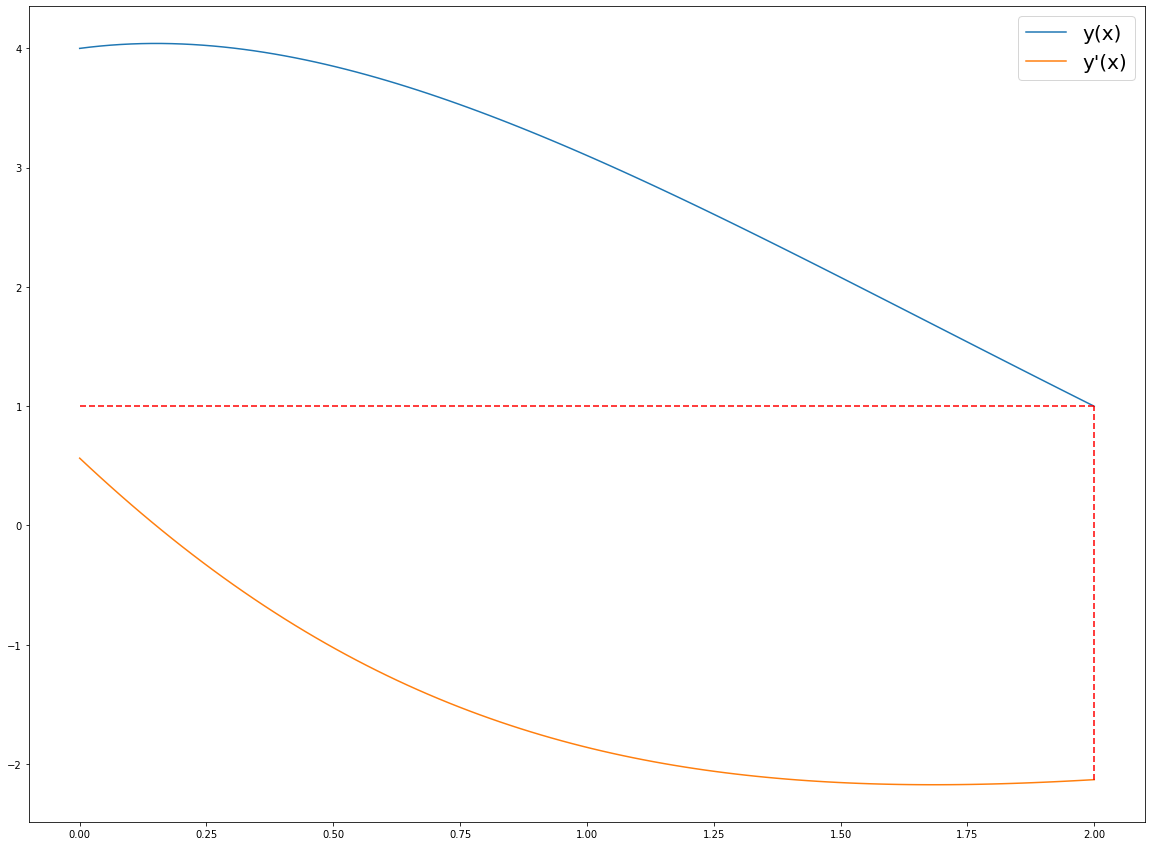

In [4]:
print("h:", h, "\ny(b, h):", y_bh, "\niterations:", m)

pt.figure(figsize=(20, 15))
pt.plot(dx, solution, label = ("y(x)", "y'(x)"))
pt.plot(dx, [y_b]*100, dashes = (4, 2), color="red")
pt.plot([2]*100, np.linspace(solution[-1][1], y_b, 100, True), dashes = (4, 2), color="red")
pt.legend(prop = {"size": 20})
pt.show()

Итак,\
$h_b \approx 0.56$,\
$|y(b, h_b) - 1| < 0.001$.

Решение краевой задачи найдено.

## Выводы

В ходе работы были частично освоены возможности библиотеки scipy (функция odeint для численного интегрирования дифференциального уравнения или системы уравнений), была решена краевая задача для дифференциального уравнения второго порядка - реализован алгоритм, осуществляющий поиск решения. Вообще говоря, её решение существует не всегда, поэтому количество итераций алгоритма поиска решения ограничено и в данной работе равно 100.